In [81]:
#In this example, support vector classifier is used as for multivariable classification
#https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#We use Support Vector classifier as a classifier
from sklearn.svm import SVC

In [68]:
path = ''
file = 'Iris.csv'
#read csv and create df
df = pd.read_csv(path + file)

#shuffle df
#df = df.reindex(np.random.permutation(df.index))

In [69]:
#To see first 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
#To know the data types of the variables.
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [71]:
#Speceis is the output class,to know the count of each class we use value_counts()
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [72]:
#Separating independant variable and dependent variable("Species")
X = df.drop(['Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 5)
(150,)


In [73]:
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 5)
(120,)
(30, 5)
(30,)


In [75]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)

In [76]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

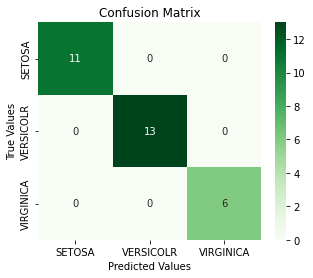

In [80]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
#Greys, Reds, Greens, Blues, Oranges, Purples, 
#BuGn, BuPu, GnBu, OrRd, PuBu, PuRd, RdPu, YlGn, 
#PuBuGn, YlGnBu, YlOrBr and YlOrRd
sns.heatmap(cm_df, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()